<h1><center>Pulsar-FRB Tutorial 2019</center></h1>
<h1><center>Introduction To Machine-learning for Pulsar-Candidate Identification</center></h1>
<h3><left>By Vishnu Balakrishnan, email: vishnu@mpifr-bonn.mpg.de</left></h3>


### Credits
These notes have been compiled from several different sources. Besides, plots from papers (that have been referenced within), some of the major slides I have borrowed are from MIT 6.S191 Lecture 1 & 2 Introduction to Deep Learning. 

http://introtodeeplearning.com/

All gifs were borrowed from 3Blue1Brown

https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw


Hands On Session:

Dependiences:

Keras 2.1.5, Tensorflow (CPU/GPU), Sklearn, Numpy

<h2><center>Motivation</center></h2>

Pulsar Candidates have been steadily increasing over time. The rise is understood to be the result of expanding survey technical specifications (Stovall et al. 2013) occurring during the period depicted in Tables 2 & 3. Finer frequency resolution, longer dwell times, and acceleration searches (Eatough et al. 2013), have significantly increased the candidate yield (Lyon 2015).

from IPython.display import Image


In [280]:
Image(url= "images/candidate_numbers.png", width=1000, height=800)

<h2><center>What is a pulsar candidate?</center></h2>

In [308]:

Image(url= "images/pulsar.png", width=800, height=800)

In [307]:
Image(url= "images/non_pulsars.png", width=800, height=800)

In [306]:
Image(url= "images/rfi.png", width=800, height=800)

<h3><center>Literature Review</center></h3>
Eatough et al. 2010: Used a single-layer perceptron (12:12:2) to train pulsar candidates using 259 pulsars and 1625 non-pulsars. Discovered one new pulsar!
   


In [305]:
#Source Eatough et al. 2010
Image(url= "images/ralph.png", width=800, height=800)

Bates et al. 2013: Single-Layer Perceptron with different features compared to Eatough et al. 2010. Rejected 99% of bad candidates and re-detected 85% of pulsars in HTRU Med-Lat

In [304]:
#Source: Bates et al. 2013
Image(url= "images/bates.png", width=800, height=400)

Lee et al. 2013: Pulsar Evaluation Algorithm for Candidate Extraction (PEACE). Hand Crafted features based on domain knowledge. Discovered atleast 47 pulsars (5 MSPs)

Morello et al. 2014: Straightforward Pulsar Identification using Neural Networks (SPINN). Basically a perceptron built on scores from features chosen based on domain knowledge. Successfully discovered atleast 4 pulsars from HTRU Med Lat.

In [303]:
# Source: Lee et al. 2013
Image(url= "images/peace.png", width=800, height=400)

Zhu et al. 2014: Pulsar Image Classification (PICS). Ensemble-Learning Algorithm. New model available called PICS-ResNet.

https://github.com/zhuww/ubc_AI


https://github.com/dzuwhf/PICS-ResNet

In [302]:
Image(url= "images/pics.png", width=800, height=400)

Lyon et. al 2016: Online Machine learning built to handle large data volumes in streaming mode. Uses an algorithm called Gaussian Hellinger Very Fast Decision Tree (GHVFDT)


https://github.com/scienceguyrob/GHVFDT

In [301]:
#Source: Lyon et al. 2016
Image(url= "images/lyon.png", width=800, height=400)

 Agarwal et al. 2019: Deeper neural networks for Fast Radio Burst detection. Uses Transfer-Learning on Convolutional Neural Networks to identify FRB candidates. They have made an open-source tool available (FETCH) to check your candidates with their trained model.
 
https://github.com/devanshkv/fetch

In [300]:
#Source: Agarwal et al. 2019
Image(url= "images/agarwal.png", width=800, height=400)

 <h2><center>What is Machine Learning?</center></h2>

In [299]:
#Source MIT Lecture 1 Introduction to Deep Learning
Image(url= "images/definition.png", width=800, height=400)

In [298]:
Image(url= "images/ml_types.jpg", width=800, height=400)

In [297]:
Image(url= "images/MLvsDL.png", width=800, height=400)

In [296]:
Image(url= "images/perceptron.png", width=800, height=400)

In [295]:
Image(url= "images/activation_fn.png", width=800, height=400)

In [294]:
Image(url= "images/single_layer_nn.png", width=800, height=400)

In [293]:
Image(url= "images/deep_layer_nn.png", width=800, height=400)

<h2><center>How do these algorithms learn?</center></h2>

In [292]:

# 
Image(url= "images/loss_function.png", width=800, height=400)

In [290]:
Image(url= "images/gradient_descent.png", width=800, height=400)

In [289]:
Image(url="https://thumbs.gfycat.com/GrandSlimyBadger-size_restricted.gif", width=1000, height=500)

In [288]:
Image(url= "images/overfitting.png", width=800, height=400)

In [287]:
Image(url= "images/dropout1.png", width=800, height=400)

In [286]:
Image(url= "images/dropout2.png", width=800, height=400)

In [137]:
#Source: Gfycat
#Image(filename="neural_net.gif", width=800, height=400)

In [285]:
Image(url="https://thumbs.gfycat.com/DeadlyDeafeningAtlanticblackgoby-size_restricted.gif", width=1000, height=500)

In [284]:
Image(url="https://thumbs.gfycat.com/ThirdTameBluebird-size_restricted.gif", width=1000, height=500)

In [282]:
Image(url= "images/overview_nn.png", width=1000, height=400)

### Choosing the right algorithm for your problem is difficult!

In [281]:
Image(url= "images/sk_learn_algo_cheat_sheet.png", width=1000, height=400)

### What output to expect?

In [309]:
Image(url= "images/binary_classification.png", width=1000, height=400)

In [310]:
Image(url= "images/prediction_matrix.png", width=1000, height=400)

In [311]:
Image(url= "images/fscore.png", width=1000, height=400)

In [312]:
#Source: Lecture: Washington State University
Image(url= "images/imbalanced.png", width=1000, height=400)

In [320]:
Image(url= "images/yann_lecun.jpg", width=400, height=400)

In [318]:
Image(url= "images/cnn_layout.png", width=1000, height=400)

# <h2><center>Practical Session</center></h2>

### Let's train some models.

In [422]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras import backend as K
from keras import optimizers
import numpy as np
import math, time
import itertools
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
%matplotlib inline

In [423]:
# Load all data
time_phase_pulsars = np.load('input_data/time_phase_data_pulsars.npy')
time_phase_nonpulsars = np.load('input_data/time_phase_data_nonpulsars.npy')

freq_phase_pulsars = np.load('input_data/freq_phase_data_pulsars.npy')
freq_phase_nonpulsars = np.load('input_data/freq_phase_data_nonpulsars.npy')

pulse_profile_pulsars = np.load('input_data/pulse_profile_data_pulsars.npy')
pulse_profile_nonpulsars = np.load('input_data/pulse_profile_data_nonpulsars.npy')

dm_curve_pulsars = np.load('input_data/dm_curve_data_pulsars.npy')
dm_curve_nonpulsars = np.load('input_data/dm_curve_data_nonpulsars.npy')

pulse_profile_gbncc_pulsars = np.load('input_data/pulse_profile_gbncc_test_data_pulsars.npy')
pulse_profile_gbncc_nonpulsars = np.load('input_data/pulse_profile_gbncc_test_data_nonpulsars_part1.npy')

reshaped_time_phase_pulsars = [np.reshape(f,(48,48,1)) for f in time_phase_pulsars]
reshaped_time_phase_nonpulsars = [np.reshape(f,(48,48,1)) for f in time_phase_nonpulsars]

reshaped_freq_phase_pulsars = [np.reshape(f,(48,48,1)) for f in freq_phase_pulsars]
reshaped_freq_phase_nonpulsars = [np.reshape(f,(48,48,1)) for f in freq_phase_nonpulsars]

print('Total Number of Pulsar Examples is %d' %len(dm_curve_pulsars))
print('Total Number of Non-Pulsar Examples is %d' %len(dm_curve_nonpulsars))

Total Number of Pulsar Examples is 2847
Total Number of Non-Pulsar Examples is 3100


In [424]:
# Helper Functions 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    img_shape = 48, 48
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

<h3><center>Let's Visualize our Input Data</center></h3>

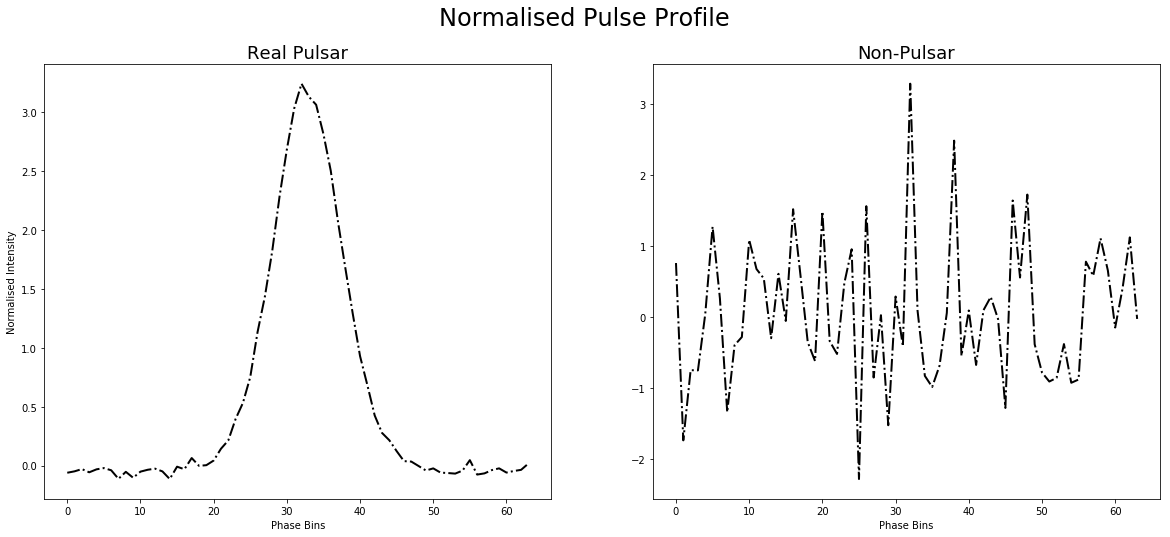

In [425]:
#Pulse Profile
sample_pulse_profile_pulsar = pulse_profile_pulsars[0]
sample_pulse_profile_nonpulsar = pulse_profile_nonpulsars[0]

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,8))
ax = axs[0]
ax.plot(sample_pulse_profile_pulsar, color='black', linestyle='-.', linewidth=2)
ax.set_title('Real Pulsar', size=18)
ax.set_xlabel('Phase Bins')
ax.set_ylabel('Normalised Intensity')
ax = axs[1]
ax.plot(sample_pulse_profile_nonpulsar, color='black', linestyle='-.', linewidth=2)
ax.set_title('Non-Pulsar', size=18)
ax.set_xlabel('Phase Bins')
fig.suptitle('Normalised Pulse Profile', size=24)

plt.show()

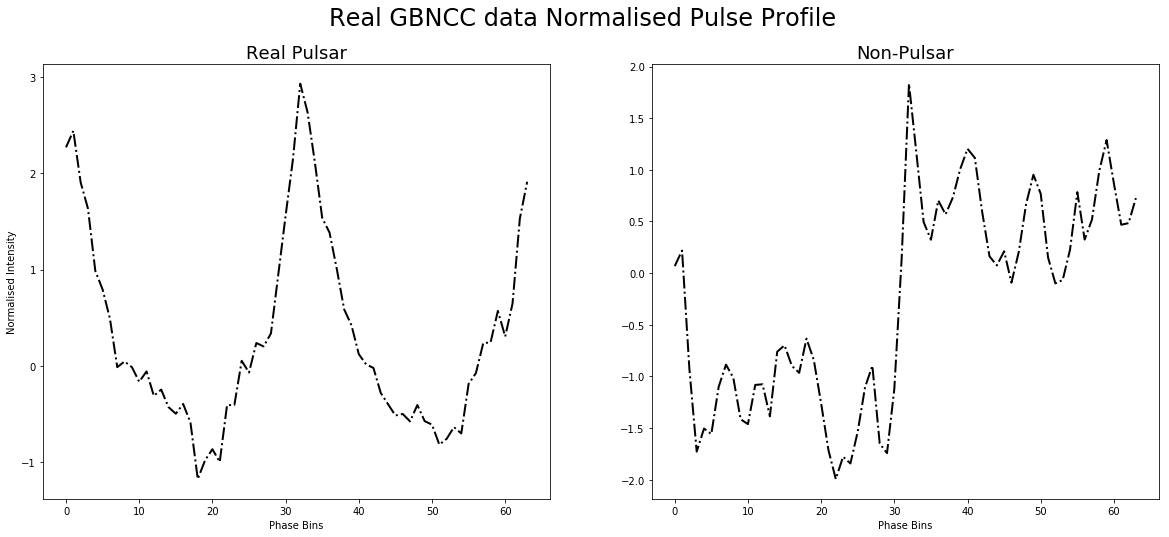

In [426]:
#Pulse Profile
sample_pulse_profile_pulsar = pulse_profile_gbncc_pulsars[0]
sample_pulse_profile_nonpulsar = pulse_profile_gbncc_nonpulsars[0]

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,8))
ax = axs[0]
ax.plot(sample_pulse_profile_pulsar, color='black', linestyle='-.', linewidth=2)
ax.set_title('Real Pulsar', size=18)
ax.set_xlabel('Phase Bins')
ax.set_ylabel('Normalised Intensity')
ax = axs[1]
ax.plot(sample_pulse_profile_nonpulsar, color='black', linestyle='-.', linewidth=2)
ax.set_title('Non-Pulsar', size=18)
ax.set_xlabel('Phase Bins')
fig.suptitle('Real GBNCC data Normalised Pulse Profile', size=24)

plt.show()

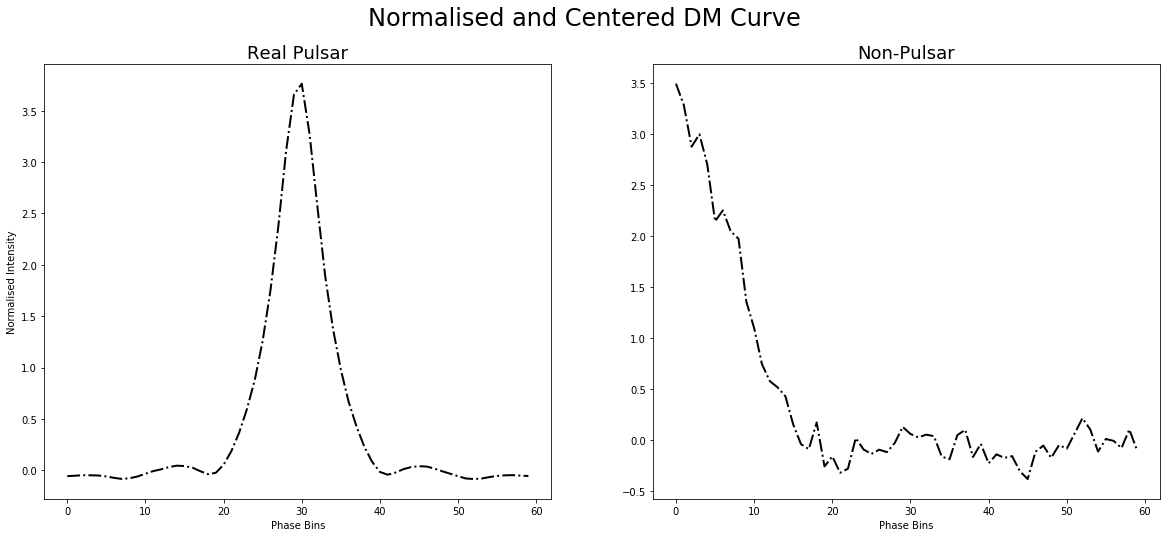

In [427]:
#DM Curve
sample_dm_curve_pulsar = dm_curve_pulsars[2]
sample_dm_curve_nonpulsar = dm_curve_nonpulsars[22]

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,8))
ax = axs[0]
ax.plot(sample_dm_curve_pulsar, color='black', linestyle='-.', linewidth=2)
ax.set_title('Real Pulsar', size=18)
ax.set_xlabel('Phase Bins')
ax.set_ylabel('Normalised Intensity')
ax = axs[1]
ax.plot(sample_dm_curve_nonpulsar, color='black', linestyle='-.', linewidth=2)
ax.set_title('Non-Pulsar', size=18)
ax.set_xlabel('Phase Bins')
fig.suptitle('Normalised and Centered DM Curve', size=24)

plt.show()


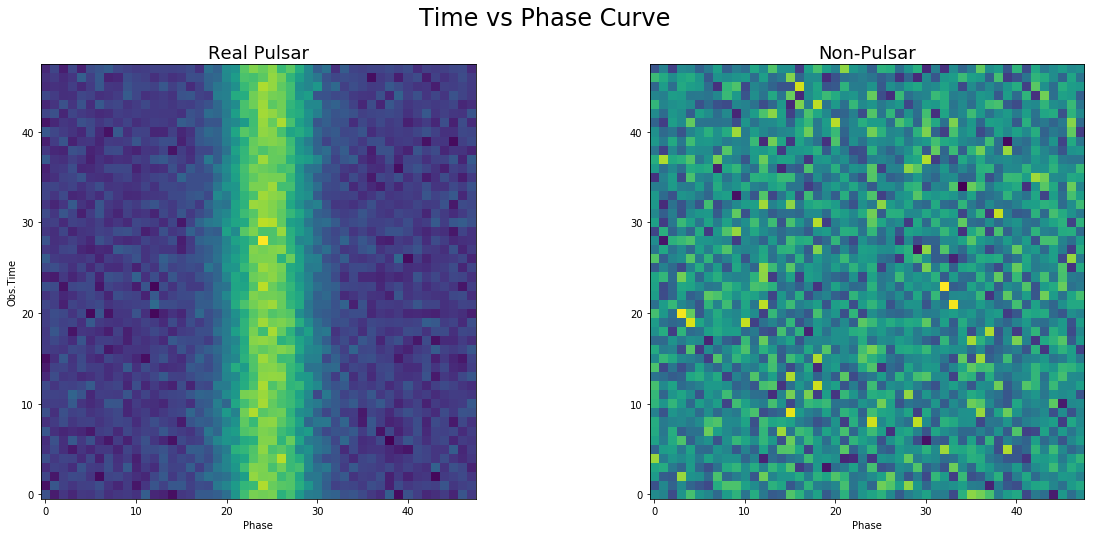

In [428]:
#Time vs Phase plot
sample_time_phase_pulsar = np.reshape(time_phase_pulsars[0],(48,48))
sample_time_phase_nonpulsar = np.reshape(time_phase_nonpulsars[0], (48,48))

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,8))
ax = axs[0]
ax.imshow(sample_time_phase_pulsar, origin='lower')
ax.set_title('Real Pulsar', size=18)
ax.set_xlabel('Phase')
ax.set_ylabel('Obs.Time')
ax = axs[1]
ax.imshow(sample_time_phase_nonpulsar, origin='lower')
ax.set_title('Non-Pulsar', size=18)
ax.set_xlabel('Phase')
fig.suptitle('Time vs Phase Curve', size=24)

plt.show()

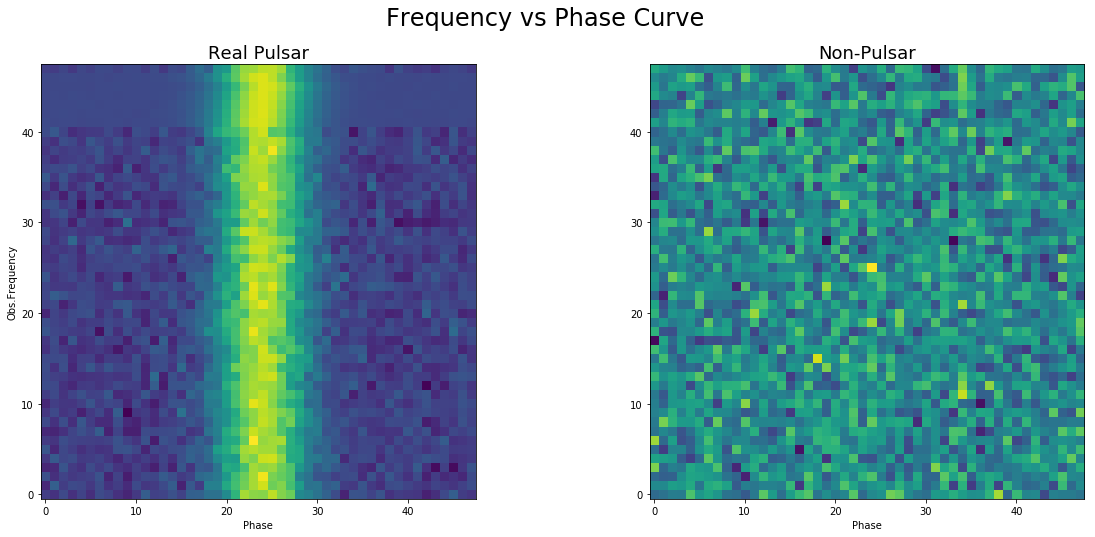

In [429]:
#Freq vs Phase plot
sample_freq_phase_pulsar = np.reshape(freq_phase_pulsars[34],(48,48))
sample_freq_phase_nonpulsar = np.reshape(freq_phase_nonpulsars[34], (48,48))

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,8))
ax = axs[0]
ax.imshow(sample_freq_phase_pulsar, origin='lower')
ax.set_title('Real Pulsar', size=18)
ax.set_xlabel('Phase')
ax.set_ylabel('Obs.Frequency')
ax = axs[1]
ax.imshow(sample_freq_phase_nonpulsar, origin='lower')
ax.set_title('Non-Pulsar', size=18)
ax.set_xlabel('Phase')
fig.suptitle('Frequency vs Phase Curve', size=24)

plt.show()

 <h3><center>Single-Layer Perceptron (Similar to Eatough et al.2010 and Bates et al. 2012)</center></h3>

### Build your model and compile

In [430]:
# Initialising the ANN
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(activation="relu", input_dim=64, kernel_initializer="uniform", units=64))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.3))
# Adding the output layer
classifier.add(Dense(activation="sigmoid", kernel_initializer="uniform", units=1))
# criterion loss and optimizer 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Read about adam optimiser here: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 65        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


### Lets test this network on Pulse Profile. Step 1 is to split your data into train and test datasets

In [431]:
# Pulsars are given label 1 and Non-Pulsars are given label 0
label_pulsars = np.ones(len(dm_curve_pulsars))
label_nonpulsars = np.zeros(len(dm_curve_nonpulsars))


pulse_profile_data_combined = np.concatenate((pulse_profile_pulsars, pulse_profile_nonpulsars), axis = 0)
pulse_profile_label_combined = np.concatenate((label_pulsars, label_nonpulsars), axis = 0)


pulse_profile_train, pulse_profile_test, pulse_profile_label_train, \
pulse_profile_label_test = train_test_split(pulse_profile_data_combined, pulse_profile_label_combined, \
                                         test_size=0.2, random_state=42)

print('Total Samples in one epoch is %d' %len(pulse_profile_data_combined))
print('Total Number of Training Samples is %d' %len(pulse_profile_train))
print('Total Number of Test Samples is %d' %len(pulse_profile_test))

Total Samples in one epoch is 5947
Total Number of Training Samples is 4757
Total Number of Test Samples is 1190


### Start Training

In [432]:
classifier.fit(pulse_profile_train, pulse_profile_label_train, validation_split=0.2, batch_size=100, epochs=50)
classifier.save_weights('pulse_profile_perceptron.h5') # Save weights to avoid training in future

Train on 3805 samples, validate on 952 samples
Epoch 1/50
3805/3805 [==============================] - 1s 201us/step - loss: 0.5615 - acc: 0.8460 - val_loss: 0.4017 - val_acc: 0.9454
Epoch 2/50
3805/3805 [==============================] - 0s 43us/step - loss: 0.2725 - acc: 0.9703 - val_loss: 0.1713 - val_acc: 0.9895
Epoch 3/50
3805/3805 [==============================] - 0s 36us/step - loss: 0.1155 - acc: 0.9908 - val_loss: 0.0761 - val_acc: 0.9958
Epoch 4/50
3805/3805 [==============================] - 0s 30us/step - loss: 0.0610 - acc: 0.9926 - val_loss: 0.0445 - val_acc: 0.9958
Epoch 5/50
3805/3805 [==============================] - 0s 37us/step - loss: 0.0435 - acc: 0.9929 - val_loss: 0.0314 - val_acc: 0.9968
Epoch 6/50
3805/3805 [==============================] - 0s 30us/step - loss: 0.0334 - acc: 0.9926 - val_loss: 0.0242 - val_acc: 0.9968
Epoch 7/50
3805/3805 [==============================] - 0s 26us/step - loss: 0.0301 - acc: 0.9934 - val_loss: 0.0202 - val_acc: 0.9968
Epoch 8

### Let's Test our Results

In [433]:
y_pred = classifier.predict(pulse_profile_test)
classified_results = np.rint(y_pred)
classified_results = np.reshape(classified_results, len(classified_results))
f_score = f1_score(pulse_profile_label_test, classified_results, average='binary')
precision = precision_score(pulse_profile_label_test, classified_results, average='binary')
recall = recall_score(pulse_profile_label_test, classified_results, average='binary')
accuracy = (pulse_profile_label_test == classified_results).sum()/len(pulse_profile_label_test)
print('F Score:', f_score, 'Precision:', precision, 'Recall:', recall, 'Accuracy:', accuracy)



F Score: 0.993127147766 Precision: 0.991423670669 Recall: 0.994836488812 Accuracy: 0.993277310924


Confusion matrix, without normalization
[[604   5]
 [  3 578]]
Normalized confusion matrix
[[ 0.99178982  0.00821018]
 [ 0.00516351  0.99483649]]


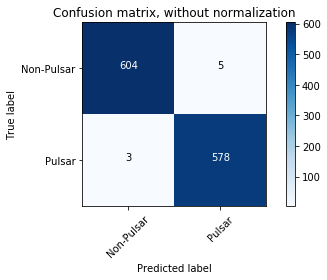

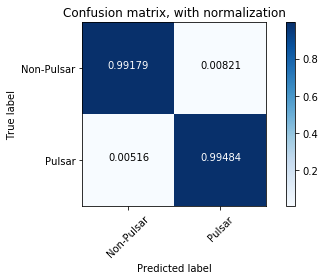

In [434]:
class_names = ['Non-Pulsar','Pulsar']

cnf_matrix = confusion_matrix(pulse_profile_label_test, classified_results)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Confusion matrix, with normalization')
plt.show()

### Test Network on real GBNCC Data

F Score: 0.0713128038898 Precision: 0.0391737891738 Recall: 0.397111913357 Accuracy: 0.873838566207
Confusion matrix, without normalization
[[19734  2698]
 [  167   110]]
Normalized confusion matrix
[[ 0.87972539  0.12027461]
 [ 0.60288809  0.39711191]]


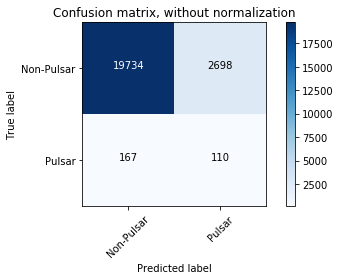

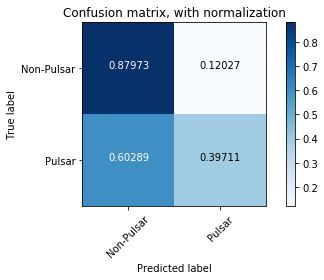

In [435]:
# Pulsars are given label 1 and Non-Pulsars are given label 0
label_gbncc_pulsars = np.ones(len(pulse_profile_gbncc_pulsars))
label_gbncc_nonpulsars = np.zeros(len(pulse_profile_gbncc_nonpulsars))


pulse_profile_data_combined = np.concatenate((pulse_profile_gbncc_pulsars, pulse_profile_gbncc_nonpulsars), axis = 0)
pulse_profile_label_combined = np.concatenate((label_gbncc_pulsars, label_gbncc_nonpulsars), axis = 0)

y_pred = classifier.predict(pulse_profile_data_combined)
classified_results = np.rint(y_pred)
classified_results = np.reshape(classified_results, len(classified_results))
f_score = f1_score(pulse_profile_label_combined, classified_results, average='binary')
precision = precision_score(pulse_profile_label_combined, classified_results, average='binary')
recall = recall_score(pulse_profile_label_combined, classified_results, average='binary')
accuracy = (pulse_profile_label_combined == classified_results).sum()/len(pulse_profile_data_combined)
print('F Score:', f_score, 'Precision:', precision, 'Recall:', recall, 'Accuracy:', accuracy)

class_names = ['Non-Pulsar','Pulsar']

cnf_matrix = confusion_matrix(pulse_profile_label_combined, classified_results)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Confusion matrix, with normalization')
plt.show()

### Let's use scikit-learn

In [436]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(pulse_profile_train, pulse_profile_label_train)

# Now obtain the classifiers 'score'
accuracy = classifier.score(pulse_profile_test, pulse_profile_label_test)
print ("Naive Bayes Classifier accuracy: ", (100* accuracy), "%.")

#Support Vector Machine
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(pulse_profile_train, pulse_profile_label_train)
classified_results = clf.predict(pulse_profile_test)

accuracy = (pulse_profile_label_test == classified_results).sum()/len(pulse_profile_label_test)
print('Support Vector Machine Classifier Accuracy:', accuracy*100, "%.")

Naive Bayes Classifier accuracy:  99.1596638655 %.
Support Vector Machine Classifier Accuracy: 99.4117647059 %.


### Convolutional Neural Network for 2D Images

In [437]:
# Define Image Dimensions

img_width, img_height = 48, 48
input_shape = (48, 48, 1)
batch_size = 200
#tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
#NAME = "Simple-CNN"
#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

# Generator is used to avoid reading entire data into system memory.
def generator(batch_size,from_list_x,from_list_y):

    assert len(from_list_x) == len(from_list_y)
    total_size = len(from_list_x)

    while True:

        for i in range(0,total_size,batch_size):
            yield np.array(from_list_x[i:i+batch_size]), np.array(from_list_y[i:i+batch_size])



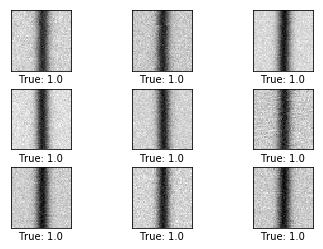

In [438]:
time_phase_data = time_phase_pulsars[0:9]
time_phase_data = [np.reshape(f, (48,48)) for f in time_phase_data]
plot_images(time_phase_data, np.ones(9))

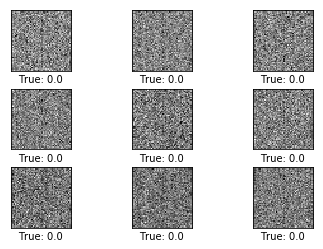

In [439]:
time_phase_data = time_phase_nonpulsars[0:9]
time_phase_data = [np.reshape(f, (48,48)) for f in time_phase_data]
plot_images(time_phase_data, np.zeros(9))

In [440]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# After these layers, we convert our 3D feature maps to 1D feature vectors ith the help of 'flatten'. We use 'dropout' layer to prevent overfitting


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
activation_16 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          18496     
__________

In [441]:
label_reshaped_time_phase_pulsars = np.ones(len(reshaped_time_phase_pulsars))
label_reshaped_time_phase_nonpulsars = np.zeros(len(reshaped_time_phase_nonpulsars))



time_phase_data_combined = np.concatenate((reshaped_time_phase_pulsars, reshaped_time_phase_nonpulsars), axis = 0)
time_phase_label_combined = np.concatenate((label_reshaped_time_phase_pulsars, label_reshaped_time_phase_nonpulsars), axis = 0)
time_phase_train, time_phase_test, time_phase_label_train, time_phase_label_test = train_test_split(time_phase_data_combined, time_phase_label_combined, test_size=0.2, random_state=42)

model.fit_generator(generator(batch_size, time_phase_train, time_phase_label_train), steps_per_epoch=len(time_phase_train)//batch_size, epochs=20, callbacks=[tensor_board])
model.save_weights('cnn_time_phase.h5')

Epoch 1/20
23/23 [==============================] - 7s 298ms/step - loss: 0.1304 - acc: 0.9457
Epoch 2/20
23/23 [==============================] - 6s 272ms/step - loss: 0.0312 - acc: 0.9928
Epoch 3/20
23/23 [==============================] - 7s 286ms/step - loss: 0.0255 - acc: 0.9939
Epoch 4/20
23/23 [==============================] - 7s 286ms/step - loss: 0.0186 - acc: 0.9952
Epoch 5/20
23/23 [==============================] - 7s 290ms/step - loss: 0.0161 - acc: 0.9950
Epoch 6/20
23/23 [==============================] - 7s 317ms/step - loss: 0.0161 - acc: 0.9952
Epoch 7/20
23/23 [==============================] - 8s 336ms/step - loss: 0.0119 - acc: 0.9954
Epoch 8/20
23/23 [==============================] - 7s 322ms/step - loss: 0.0100 - acc: 0.9957
Epoch 9/20
23/23 [==============================] - 8s 359ms/step - loss: 0.0104 - acc: 0.9959
Epoch 10/20
23/23 [==============================] - 8s 329ms/step - loss: 0.0127 - acc: 0.9967
Epoch 11/20
23/23 [==============================

F Score: 0.994836488812 Precision: 0.994836488812 Recall: 0.994836488812
Confusion matrix, without normalization
[[606   3]
 [  3 578]]


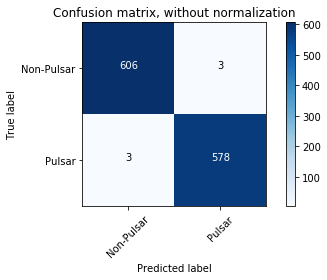

In [381]:
predict = model.predict_generator(generator(batch_size, time_phase_test, time_phase_label_test), steps=math.ceil(len(time_phase_test)/batch_size))
np.save('predictions.npy', predict)
classified_results = np.rint(predict)
f_score = f1_score(time_phase_label_test, classified_results, average='binary')
precision = precision_score(time_phase_label_test, classified_results, average='binary')
recall = recall_score(time_phase_label_test, classified_results, average='binary')
print('F Score:', f_score, 'Precision:', precision, 'Recall:', recall)

class_names = ['Non-Pulsar','Pulsar']

cnf_matrix = confusion_matrix(time_phase_label_test, classified_results)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')



Normalized confusion matrix
[[ 0.99507389  0.00492611]
 [ 0.00516351  0.99483649]]


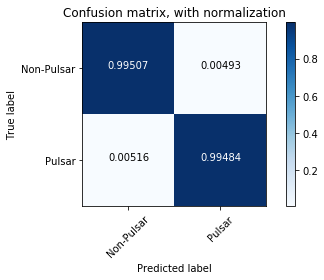

In [382]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Confusion matrix, with normalization')

In [384]:
label_reshaped_freq_phase_pulsars = np.ones(len(reshaped_freq_phase_pulsars))
label_reshaped_freq_phase_nonpulsars = np.zeros(len(reshaped_freq_phase_nonpulsars))

freq_phase_data_combined = np.concatenate((reshaped_freq_phase_pulsars, reshaped_freq_phase_nonpulsars), axis = 0)
freq_phase_label_combined = np.concatenate((label_reshaped_freq_phase_pulsars, label_reshaped_freq_phase_nonpulsars), axis = 0)
freq_phase_train, freq_phase_test, freq_phase_label_train, freq_phase_label_test = train_test_split(freq_phase_data_combined, freq_phase_label_combined, test_size=0.2, random_state=42)

model.fit_generator(generator(batch_size, freq_phase_train, freq_phase_label_train), steps_per_epoch=len(freq_phase_train)//batch_size, epochs=20, callbacks=[tensor_board])
model.save_weights('cnn_freq_phase.h5')

Epoch 1/20
23/23 [==============================] - 8s 361ms/step - loss: 0.0288 - acc: 0.9920
Epoch 2/20
23/23 [==============================] - 7s 322ms/step - loss: 0.0182 - acc: 0.9950
Epoch 3/20
23/23 [==============================] - 7s 321ms/step - loss: 0.0166 - acc: 0.9974
Epoch 4/20
23/23 [==============================] - 7s 310ms/step - loss: 0.0140 - acc: 0.9974
Epoch 5/20
23/23 [==============================] - 7s 324ms/step - loss: 0.0119 - acc: 0.9970
Epoch 6/20
23/23 [==============================] - 7s 306ms/step - loss: 0.0082 - acc: 0.9980
Epoch 7/20
23/23 [==============================] - 7s 297ms/step - loss: 0.0065 - acc: 0.9991
Epoch 8/20
23/23 [==============================] - 7s 297ms/step - loss: 0.0041 - acc: 0.9987
Epoch 9/20
23/23 [==============================] - 8s 330ms/step - loss: 0.0064 - acc: 0.9985
Epoch 10/20
23/23 [==============================] - 7s 316ms/step - loss: 0.0058 - acc: 0.9987
Epoch 11/20
23/23 [==============================

In [385]:
predict = model.predict_generator(generator(batch_size, freq_phase_test, freq_phase_label_test), steps=math.ceil(len(freq_phase_test)/batch_size))
np.save('predictions.npy', predict)
classified_results = np.rint(predict)
f_score = f1_score(freq_phase_label_test, classified_results, average='binary')
precision = precision_score(freq_phase_label_test, classified_results, average='binary')
recall = recall_score(freq_phase_label_test, classified_results, average='binary')
print('F Score:', f_score, 'Precision:', precision, 'Recall:', recall)

F Score: 0.996557659208 Precision: 0.996557659208 Recall: 0.996557659208


### Multiple Input Model. Use functional API of Keras

In [418]:
from keras.layers import Input, Dense, concatenate
from keras.models import Model

pulse_profile = Input(shape=(64,))
dm_curve = Input(shape=(60,))
 
# the first branch operates on the pulse profile
x = Dense(8, activation="relu")(pulse_profile)
x = Dense(4, activation="relu")(x)
x = Model(inputs=pulse_profile, outputs=x)
 
# the second branch opreates on the dm curve
y = Dense(64, activation="relu")(dm_curve)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=dm_curve, outputs=y)
 
# combine the output of the two branches
combined = concatenate([x.output, y.output])
 
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)
 
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 60)           0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 64)           0                                            
__________________________________________________________________________________________________
dense_66 (Dense)                (None, 64)           3904        input_12[0][0]                   
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 8)            520         input_11[0][0]                   
__________________________________________________________________________________________________
dense_67 (

In [419]:
label_pulsars = np.ones(len(dm_curve_pulsars))
label_nonpulsars = np.zeros(len(dm_curve_nonpulsars))


dm_curve_data_combined = np.concatenate((dm_curve_pulsars, dm_curve_nonpulsars), axis = 0)
dm_curve_label_combined = np.concatenate((label_pulsars, label_nonpulsars), axis = 0)

dm_curve_train, dm_curve_test, dm_curve_label_train, \
dm_curve_label_test = train_test_split(dm_curve_data_combined, dm_curve_label_combined, \
                                         test_size=0.2, random_state=42)

print('Total Samples in one epoch is %d' %len(dm_curve_data_combined))
print('Total Number of Training Samples is %d' %len(dm_curve_train))
print('Total Number of Test Samples is %d' %len(dm_curve_test))

Total Samples in one epoch is 5947
Total Number of Training Samples is 4757
Total Number of Test Samples is 1190


In [420]:
model.fit([pulse_profile_train, dm_curve_train],pulse_profile_label_train, validation_split=0.2, batch_size=100, epochs=50)
model.save_weights('pulse_profile_and_dm_curve_ann.h5')

Train on 3805 samples, validate on 952 samples
Epoch 1/50
3805/3805 [==============================] - 1s 179us/step - loss: 6.9014 - acc: 0.4607 - val_loss: 5.8741 - val_acc: 0.5200
Epoch 2/50
3805/3805 [==============================] - 0s 29us/step - loss: 6.1822 - acc: 0.5243 - val_loss: 1.9480 - val_acc: 0.5567
Epoch 3/50
3805/3805 [==============================] - 0s 29us/step - loss: 0.2488 - acc: 0.8796 - val_loss: 0.0976 - val_acc: 0.9307
Epoch 4/50
3805/3805 [==============================] - 0s 31us/step - loss: 0.0808 - acc: 0.9346 - val_loss: 0.0825 - val_acc: 0.9317
Epoch 5/50
3805/3805 [==============================] - 0s 29us/step - loss: 0.0722 - acc: 0.9361 - val_loss: 0.0917 - val_acc: 0.9265
Epoch 6/50
3805/3805 [==============================] - 0s 28us/step - loss: 0.0691 - acc: 0.9359 - val_loss: 0.0899 - val_acc: 0.9265
Epoch 7/50
3805/3805 [==============================] - 0s 27us/step - loss: 0.0667 - acc: 0.9356 - val_loss: 0.0893 - val_acc: 0.9265
Epoch 8

### Are you paying attention?

### Mini test! (Fix the bug)

In [421]:

y_pred = model.predict([pulse_profile_test, dm_curve_test])
classified_results = np.rint(y_pred)
classified_results = np.reshape(classified_results, len(classified_results))
f_score = f1_score(pulse_profile_label_test, classified_results, average='binary')
precision = precision_score(pulse_profile_label_test, classified_results, average='binary')
recall = recall_score(pulse_profile_label_test, classified_results, average='binary')
accuracy = (pulse_profile_label_test == classified_results).sum()/len(pulse_profile_label_test)
print('F Score:', f_score, 'Precision:', precision, 'Recall:', recall, 'Accuracy:', accuracy)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Exercise: Combine Multiple inputs (2D images and 1D data) into a CNN and train